# Seaborn


In [3]:
# plotting Distributions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#seaborn style
sns.set_style("whitegrid")

#data 

df=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\global_sales_data\market_fact.csv")


# Histogram and Density Plots

    Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The sns.distplot() function plots a density curve. Notice that this is aesthetically better than vanilla matplotlib.


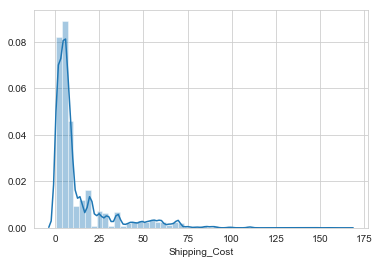

In [5]:
#density plot
sns.distplot(df['Shipping_Cost'])
plt.show()

 You can also plot what is known as the rug plot which plots the actual data points as small vertical bars. The rug plot is simply specified as an argument of the distplot().

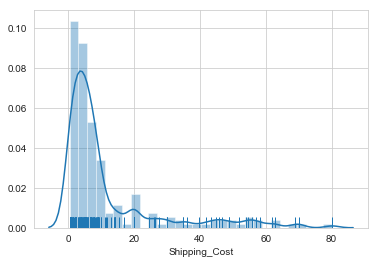

In [6]:
# rug plot 
#rug=True
#plotting only a few points since rug takes a long while
sns.distplot(df['Shipping_Cost'][:200],rug=True)
plt.show()

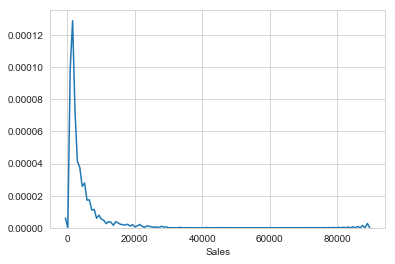

In [7]:
#plotting without including histogram plots
sns.distplot(df['Sales'], hist=False)
plt.show()

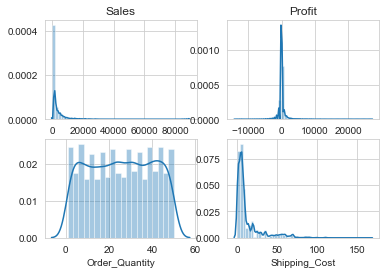

In [10]:
 """
 
Since seaborn uses matplotlib behind the scenes, 
the usual matplotlib functions work well with seaborn. 
For example, you can use subplots to plot
multiple univariate distributions.

 """
    
    #subplots
    
#subplot 1
    
plt.subplot(2,2,1)
plt.title('Sales')
sns.distplot(df['Sales'])

#subplot 2
plt.subplot(2,2,2)
plt.title('Profit')
sns.distplot(df['Profit'])

#subplot 3
plt.subplot(2,2,3)
#plt.title('order quantity')
sns.distplot(df['Order_Quantity'])

#subplot 4
plt.subplot(2,2,4)
#plt.title('shippingcost')
sns.distplot(df['Shipping_Cost'])

plt.show()

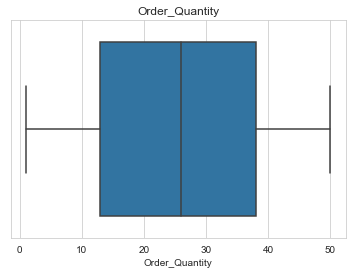

In [11]:
#boxplots are use to plots quartiles of the graph
sns.boxplot(df['Order_Quantity'])
plt.title('Order_Quantity')

plt.show()

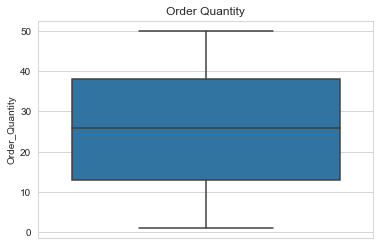

In [12]:
#to plot the values on the vetical axis, specify y=variable
sns.boxplot(y=df['Order_Quantity'])
plt.title('Order Quantity')
plt.show()

# Bivariate Distributions

Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.

They are also called joint distributions and are created using sns.jointplot().

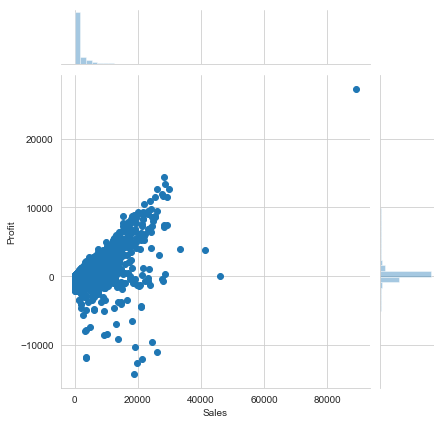

In [13]:
#join plots of profit and sales
sns.jointplot('Sales','Profit',df)
plt.show()

Notice that both the distributions are heavily skewed and all the points seem to be concentrated in one region. That is because of some extreme values of Profits and Sales which matplotlib is trying to accomodate in the limited space of the plot.


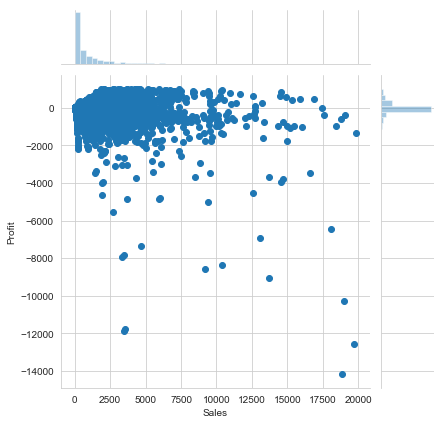

In [15]:
#improving this graph
# removing the extreme conditions

df= df[(df.Profit < 1000 ) & (df.Sales < 20000)]

sns.jointplot('Sales','Profit',df)
plt.show()

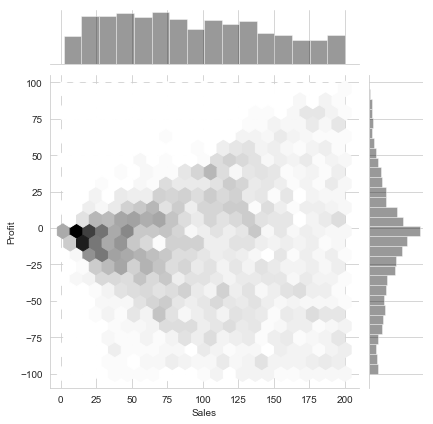

In [21]:
#further making graph more readable adding kind=hex, will create hexbin plot

df=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\global_sales_data\market_fact.csv")

df=df[(df.Profit < 100 ) & (df.Profit >-100) & (df.Sales <200)]

sns.jointplot('Sales','Profit', df, kind="hex", color="k")

plt.show()

The bottom-right region of the plot represents orders where the Sales is high but the Profit is low, i.e. even when the store is getting highb revenue, the orders are still making losses. These are the kind of orders a business would want to avoid. 


## Plotting Pairwise Relationships

You'll find it helpful to plot pairwise relationships between multiple numeric variables. For e.g., here we have taken the prices of some popular cryptocurrencies such as bitcoin, litecoin, ethereum, monero, neo, quantum and ripple. 

Now, the crypto enthusiasts would know that the prices of these currencies vary with each other. If bitcoin goes up, the others will likely follow suit, etc.


Now, say you want to trade in some currencies. Given a set of cryptocurrencies, how will you decide when and which one to buy/sell? It will be helpful to analyse past data and identify some trends in these currencies.


In [16]:
#crypto data
import pandas as pd
btc=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Bitcoin_Price.csv")
ether=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Ethereum_Price.csv")
ltc=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Litecoin_Price.csv")
monero=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Monero_Price.csv")
neo=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Neo_Price.csv")
quantum=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Qtum_Price.csv")
ripple=pd.read_csv("F:\jupyter-notebook\AtoZ machine learning kaggle master\Data_Visualisation\Datavisual\crypto_data\Ripple_Price.csv")

#putting a suffix with column so that joins are easy
btc.columns=btc.columns.map(lambda x: str(x) + '_btc')
ether.columns=ether.columns.map(lambda x: str(x) + '_et')
ltc.columns=ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns=monero.columns.map(lambda x: str(x) + '_mon')
neo.columns=neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns=quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns=ripple.columns.map(lambda x: str(x) + '_rip')

btc.head()






SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 97-98: malformed \N character escape (<ipython-input-16-54e313b3a5b1>, line 7)

In [14]:
#merging all the files by data
m1=pd.merge(btc,ether,how="inner",left_on="Date_btc",right_on="Date_et")
m2=pd.merge(m1,ltc,how="inner",left_on="Date_btc",right_on="Date_ltc")
m3=pd.merge(m2,monero,how="inner",left_on="Date_btc",right_on="Date_mon")
m4=pd.merge(m3,quantum,how="inner",left_on="Date_btc",right_on="Date_qt")
crypto=pd.merge(m4,ripple,how="inner",left_on="Date_btc",right_on="Date_rip")

crypto.head()


,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,...,Close_qt,Volume_qt,Market Cap_qt,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
